In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import math
from lasso_func import *

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Vary M

In [2]:
# Vary the model with a multiplicative factor
def vary_multiply(model):
    k = 10
    m = [1, 1.2, 1.4, 1.6, 1.8, 2]
    a = 0.1
    n = 1000
    c = 1
    for i in m: 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=k, m=i, num_relevant_cov=c)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(n, k, a, i, c, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show() 

Mean: 22.46204701404128 Median: 22.465988638387508 Mode: [[19.26608967]] Variance: 0.760913556280939
Mean: 22.433231166817954 Median: 22.434727779511558 Mode: [[19.25719323]] Variance: 0.7367651822791829
Mean: 22.442041659396573 Median: 22.457966925081536 Mode: [[19.48723166]] Variance: 0.7131934266354383
Mean: 22.433009364732083 Median: 22.42242273984832 Mode: [[19.31840334]] Variance: 0.7091389474326577
Mean: 22.4837642359559 Median: 22.520969428577594 Mode: [[19.75586344]] Variance: 0.7213773397212633
Mean: 22.452607102146107 Median: 22.474135654485288 Mode: [[20.01790044]] Variance: 0.7086688824028845


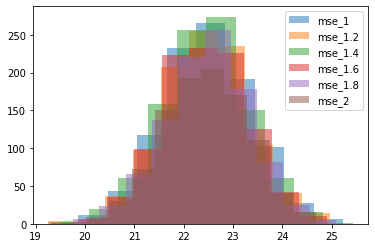

In [3]:
vary_multiply(1)

Mean: 22.470731047091217 Median: 22.483011254272743 Mode: [[19.61767732]] Variance: 0.7121941182585166
Mean: 22.416733687274352 Median: 22.450641692324197 Mode: [[19.37200368]] Variance: 0.7619887383450709
Mean: 22.436710893205483 Median: 22.484276326836934 Mode: [[18.55053038]] Variance: 0.7883986989196023
Mean: 22.430282971828724 Median: 22.465854332500072 Mode: [[19.66215414]] Variance: 0.7544106369970878
Mean: 22.433329628919793 Median: 22.468982414862094 Mode: [[20.080336]] Variance: 0.6450290047548165
Mean: 22.478544844392083 Median: 22.487458024301162 Mode: [[19.96912035]] Variance: 0.7184649767755124


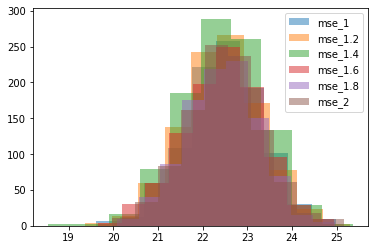

In [4]:
vary_multiply(2)

Mean: 22.464839048992317 Median: 22.467785365506742 Mode: [[19.7057421]] Variance: 0.6463734251039968
Mean: 22.465180508879858 Median: 22.464816705284814 Mode: [[19.84238796]] Variance: 0.7534933828540553
Mean: 22.45636837473249 Median: 22.426523860812445 Mode: [[19.8200681]] Variance: 0.6801734040825913
Mean: 22.457122845290485 Median: 22.45856669940827 Mode: [[18.44258483]] Variance: 0.7756546191132526
Mean: 22.468566311315747 Median: 22.505887567481594 Mode: [[19.64995281]] Variance: 0.7239223808452486
Mean: 22.453577567238906 Median: 22.44868839045695 Mode: [[19.8963138]] Variance: 0.7436037250334052


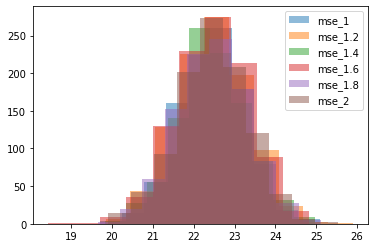

In [5]:
vary_multiply(3)

Mean: -2.23192016194584 Median: -2.2132947804874648 Mode: [[-3.10638041]] Variance: 0.06600068943777197
Mean: -2.2291573239518354 Median: -2.2166693676005256 Mode: [[-3.26054556]] Variance: 0.06774471331013865
Mean: -2.2260039034692127 Median: -2.214081491926081 Mode: [[-3.18228659]] Variance: 0.066131702276289
Mean: -2.2336501572843948 Median: -2.2101462944995216 Mode: [[-3.12197844]] Variance: 0.06353241413270397
Mean: -2.2331081443558642 Median: -2.200417263371383 Mode: [[-3.41314622]] Variance: 0.06977227441418297
Mean: -2.218816717114465 Median: -2.19909033757473 Mode: [[-3.33898939]] Variance: 0.06567666219318519


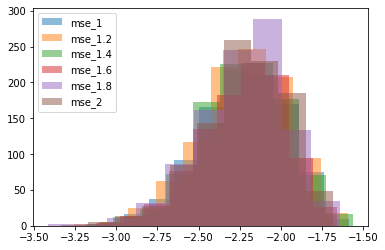

In [6]:
vary_multiply(4)

Mean: -1.4595119966739445 Median: -1.4633761193263841 Mode: [[-1.72524388]] Variance: 0.005790939939304113
Mean: -1.7475359189149986 Median: -1.7481701767724558 Mode: [[-2.05468388]] Variance: 0.0075673031455956614
Mean: -2.028080262898501 Median: -2.0256077947613846 Mode: [[-2.39330698]] Variance: 0.00972047866291655
Mean: -2.322091099507505 Median: -2.3181525723844896 Mode: [[-2.68695463]] Variance: 0.010776733718922085
Mean: -2.6044611604080274 Median: -2.600820827537151 Mode: [[-2.9935975]] Variance: 0.015220756034547353
Mean: -2.886163889354767 Median: -2.8792085198487536 Mode: [[-3.3571246]] Variance: 0.017869778762546838


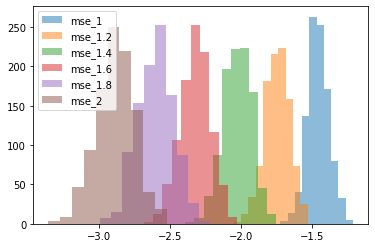

In [7]:
vary_multiply(5)

Mean: 1.9831859847013462 Median: 1.9663341437241688 Mode: [[1.13554084]] Variance: 0.10894180811288967
Mean: 1.3037248635518812 Median: 1.3158987284249615 Mode: [[-0.64789967]] Variance: 0.2355807413948417
Mean: 0.5007675329519624 Median: 0.5392602794765666 Mode: [[-1.55768661]] Variance: 0.39627234624927327
Mean: -0.36321145095007756 Median: -0.3366863685586894 Mode: [[-3.17517056]] Variance: 0.5450710517140358
Mean: -1.1201371053325833 Median: -1.0931799085024823 Mode: [[-3.43703539]] Variance: 0.5512942814312348
Mean: -1.8072581937725585 Median: -1.805066800726062 Mode: [[-4.5682801]] Variance: 0.5689288053017877


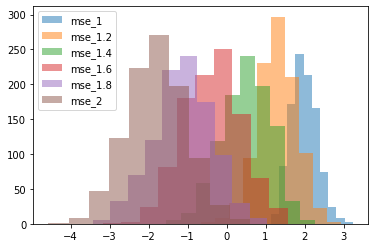

In [8]:
vary_multiply(6)

## Vary number of covariates and number of relevant covariates

In [9]:
# Vary number of relevant x variables
def vary_relevant_xvars(model):
    k = [1,5,15,20]
    c = [24,20,10,5]
    m = 1
    a = 0.1
    n = 1000
    for i, j in zip(k, c): 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=m, num_relevant_cov=j)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for l in range(1000):
            results = setup_test_mse(n, i, a, m, j, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()

Mean: 22.41254383446861 Median: 22.450338804149723 Mode: [[19.81156273]] Variance: 0.7058053254206657
Mean: 22.402808758616853 Median: 22.433078680912924 Mode: [[19.71120308]] Variance: 0.7248103432420564
Mean: 22.43537808714121 Median: 22.467452063265007 Mode: [[19.69725313]] Variance: 0.7810549852212307
Mean: 22.423154459442028 Median: 22.41270079744039 Mode: [[18.92831105]] Variance: 0.6649953744881418


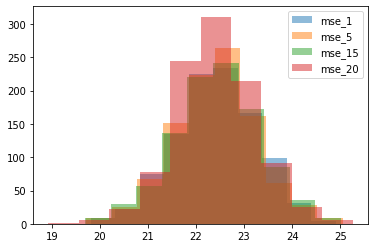

In [10]:
vary_relevant_xvars(1)

Mean: 22.493969030805452 Median: 22.485147756703533 Mode: [[19.55256748]] Variance: 0.7253103825571107
Mean: 22.47464095290965 Median: 22.49294643242188 Mode: [[18.37867362]] Variance: 0.6982825487803616
Mean: 22.40506844255961 Median: 22.40185222701475 Mode: [[19.52310367]] Variance: 0.7290343057278708
Mean: 22.423884334612215 Median: 22.441653313775383 Mode: [[19.83197789]] Variance: 0.7431536313533984


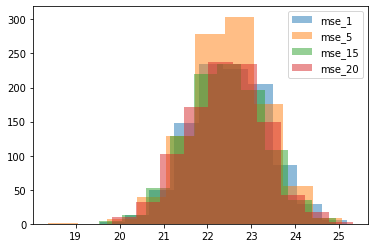

In [11]:
vary_relevant_xvars(2)

Mean: 22.466049948865226 Median: 22.480722569734183 Mode: [[19.69818031]] Variance: 0.7402695184764363
Mean: 22.443954168073304 Median: 22.46358434214688 Mode: [[19.40523346]] Variance: 0.7079148372617248
Mean: 22.420100326642423 Median: 22.436045379060374 Mode: [[19.03235927]] Variance: 0.7329285914449966
Mean: 22.43359569490784 Median: 22.452186039066085 Mode: [[19.66187821]] Variance: 0.7096811904303173


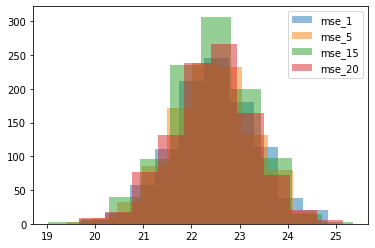

In [12]:
vary_relevant_xvars(3)

Mean: -7.51275067170569 Median: -7.50359353968126 Mode: [[-8.68281213]] Variance: 0.10285988607590867
Mean: -7.006674884197886 Median: -7.006028961098815 Mode: [[-8.28078783]] Variance: 0.0917669555010325
Mean: -5.315585365993917 Median: -5.319752742991978 Mode: [[-6.14197504]] Variance: 0.06371380002630625
Mean: -4.165770129938788 Median: -4.15846790887637 Mode: [[-4.90827593]] Variance: 0.05944992693821439


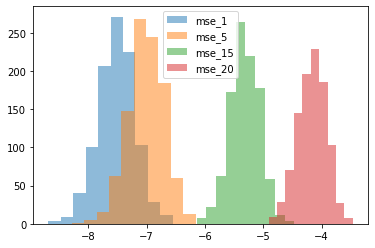

In [13]:
vary_relevant_xvars(4)

Mean: -6.865935239866065 Median: -6.873393658877762 Mode: [[-7.71171467]] Variance: 0.08416378850901324
Mean: -6.320089525255612 Median: -6.310687394869632 Mode: [[-7.23980288]] Variance: 0.07189397201615258
Mean: -4.568341150897447 Median: -4.560875378629582 Mode: [[-5.23164662]] Variance: 0.04189352112235909
Mean: -3.2639321919869264 Median: -3.2624867863463645 Mode: [[-3.77185436]] Variance: 0.02316987652349169


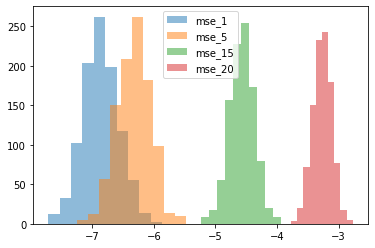

In [14]:
vary_relevant_xvars(5)

Mean: 10.814946062373537 Median: 11.13517566262362 Mode: [[5.60471713]] Variance: 1.7340324511664464
Mean: 7.487079187413613 Median: 7.339675869519134 Mode: [[4.21477666]] Variance: 1.4772737139404175
Mean: 4.089816303739379 Median: 4.081691646523779 Mode: [[2.98592691]] Variance: 0.14956009681213914
Mean: 3.2996899677664664 Median: 3.298233577325901 Mode: [[2.28265898]] Variance: 0.10899409322653918


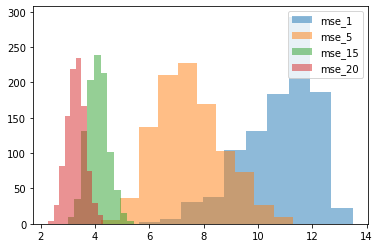

In [15]:
vary_relevant_xvars(6)